# Install Libraries

In [1]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.2 MB/s eta 0:00:00


In [2]:
! pip install -q kaggle

# Import dataset from kaggle

In [3]:
! mkdir ~/.kaggle
! cp "/content/drive/MyDrive/Colab Notebooks/kaggle json/kaggle.json" ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d "brendan45774/test-file"
! mkdir dataset
! unzip test-file.zip -d dataset

  0% 0.00/11.2k [00:00<?, ?B/s]
100% 11.2k/11.2k [00:00<00:00, 33.0MB/s]
Archive:  test-file.zip
  inflating: dataset/tested.csv      


# Description

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife


---


parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
warnings.filterwarnings("ignore")
%matplotlib inline

# Reading the Dataset

In [6]:
df = pd.read_csv('dataset/tested.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploring the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


 Drop some columns

In [9]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S


In [11]:
# shape of the dataset
df.shape

(418, 9)

In [12]:
df['Sex_Encoded'] = df['Sex'].map({'male' : 0, 'female' : 1})

# Data cleaning

In [13]:
def show_missing_values(dataframe : pd.DataFrame, is_percentage : bool = False) -> None:
  if not is_percentage:
    print(dataframe.isnull().sum())
  else:
    for cols in list(dataframe.columns):
      total_nan_values = dataframe[cols].isna().sum()
      total_size = dataframe.shape[0]
      print(f"Error percentage in {cols} => {round((total_nan_values / total_size), 2) * 100}%")

In [14]:
show_missing_values(df)

Survived         0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
Sex_Encoded      0
dtype: int64


In [15]:
show_missing_values(df, is_percentage=True)

Error percentage in Survived => 0.0%
Error percentage in Pclass => 0.0%
Error percentage in Sex => 0.0%
Error percentage in Age => 21.0%
Error percentage in SibSp => 0.0%
Error percentage in Parch => 0.0%
Error percentage in Fare => 0.0%
Error percentage in Cabin => 78.0%
Error percentage in Embarked => 0.0%
Error percentage in Sex_Encoded => 0.0%


**Cabin has highest nan value, so drop the Cabin column**

In [16]:
df.drop(['Cabin'], axis=1, inplace=True)

**Faire column has only one nan value, fill it with mean of the Fare**

In [17]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

**Age Column has 86 nan values that is 21% of the dataset has nan values in Age Column**

In [18]:
df['Age'].head()

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

**Approach Age column in different way, by creating a Logistic Regression model to find the missing values in Age column**

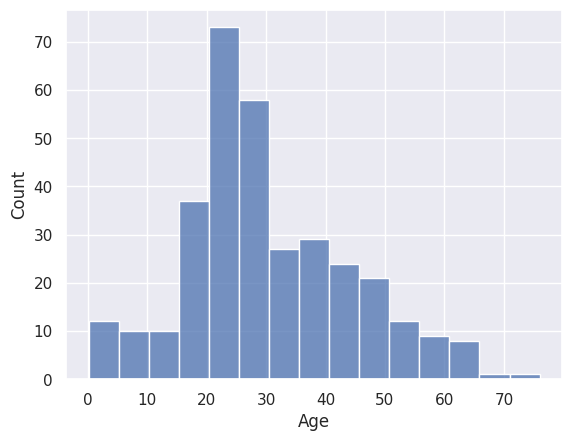

In [19]:
#before predict the missing values

sns.histplot(df['Age'])
plt.show()

build a missing value predicting model

In [20]:
from sklearn.linear_model import LinearRegression

# Create a subset of the dataset with non-missing age values
age_df = df[['Survived', 'Pclass', 'Age', 'Fare']]  # Include relevant features

# Split into two subsets: one with missing ages and one without
known_age = age_df.loc[age_df['Age'].notna()]
unknown_age = age_df.loc[age_df['Age'].isna()]

# Create a linear regression model to predict missing ages
model = LinearRegression()
model.fit(known_age.drop('Age', axis=1), known_age['Age'])
predicted_age = model.predict(unknown_age.drop('Age', axis=1))

# Fill in the missing age values with the predicted values
df.loc[df['Age'].isna(), 'Age'] = predicted_age
print("Age missing value are filed")

Age missing value are filed


In [21]:
show_missing_values(df)

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Sex_Encoded    0
dtype: int64


In [22]:
show_missing_values(df, is_percentage=True)

Error percentage in Survived => 0.0%
Error percentage in Pclass => 0.0%
Error percentage in Sex => 0.0%
Error percentage in Age => 0.0%
Error percentage in SibSp => 0.0%
Error percentage in Parch => 0.0%
Error percentage in Fare => 0.0%
Error percentage in Embarked => 0.0%
Error percentage in Sex_Encoded => 0.0%


**We have completly filled the nan values for the dataset**

# Exploratory Data Analysis (EDA)

In [23]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Encoded
0,0,3,male,34.5,0,0,7.8292,Q,0
1,1,3,female,47.0,1,0,7.0000,S,1
2,0,2,male,62.0,0,0,9.6875,Q,0
3,0,3,male,27.0,0,0,8.6625,S,0
4,1,3,female,22.0,1,1,12.2875,S,1


The Survived column indicates whether the passenger survived (value 1) or not (value 0) in the dataset.

In [24]:
# Calculate the average of "Survived"
survived_average = df["Survived"].mean()

# Print the average
print(f"Average of Survived: {round(survived_average*100, 2)}%")

Average of Survived: 36.36%


**The survival rate of the Titanic dataset is approximately 35%, majority of the people will not survied**

**Now finding the relationship between the Survied column and other columns**

Pclass        -0.108615
Sex_Encoded    1.000000
Age           -0.006750
Fare           0.191382
Survived       1.000000
Name: Survived, dtype: float64


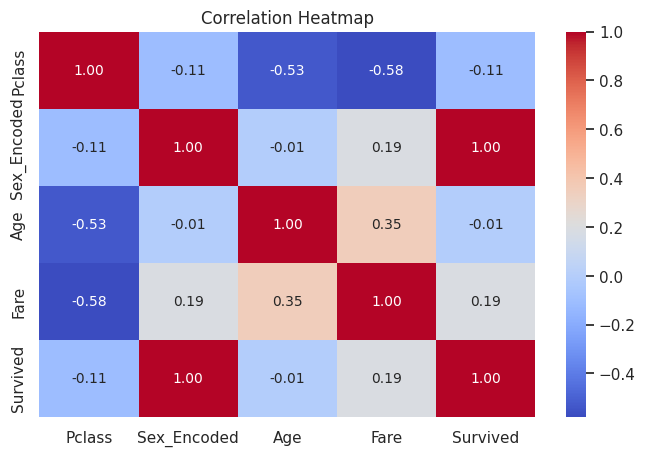

In [25]:
# Select the desired columns for correlation analysis
selected_columns = ['Pclass', 'Sex_Encoded', 'Age', 'Fare']
subset_df = df[selected_columns + ['Survived']]

# Compute the correlation matrix
corr_matrix = subset_df.corr()
print(corr_matrix.Survived)

# Create a heatmap using the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, cbar=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

**Relationship between Survived and Sex_Encoded Column**

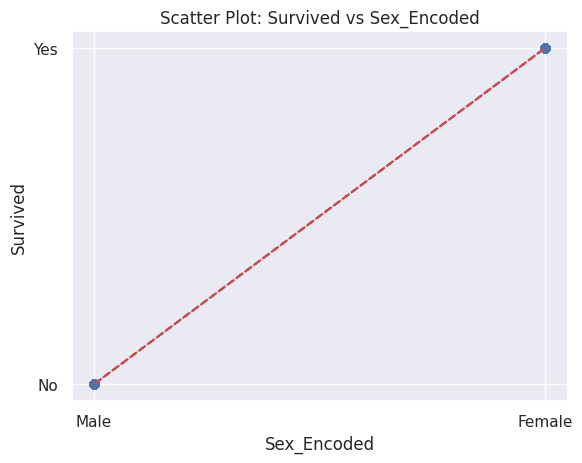

In [26]:
# Scatter plot
plt.scatter(df['Sex_Encoded'], df['Survived'])

# Trend line
z = np.polyfit(df['Sex_Encoded'], df['Survived'], 1)
p = np.poly1d(z)
plt.plot(df['Sex_Encoded'], p(df['Sex_Encoded']), "r--")

# Plot labels
plt.xlabel('Sex_Encoded')
plt.ylabel('Survived')

# Plot title
plt.title('Scatter Plot: Survived vs Sex_Encoded')
plt.yticks([0, 1], ['No', 'Yes'])
plt.xticks([0, 1], ['Male', 'Female'])
# Show the plot

plt.show()

The variable ***'Sex_Encoded'*** is strongly positively correlated with the ***dependent column ('Survived')***. The representation indicates that the being classified as ***male(sex_encoded=0)*** has ***lower chance of Survived*** while being classified as ***femal(sex_encode=1)*** has ***Higher chance of Survival***

---

So, The Titatnic Survival Dataset gives High importance to the ***Gender***





In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Encoded
0,0,3,male,34.5,0,0,7.8292,Q,0
1,1,3,female,47.0,1,0,7.0000,S,1
2,0,2,male,62.0,0,0,9.6875,Q,0
3,0,3,male,27.0,0,0,8.6625,S,0
4,1,3,female,22.0,1,1,12.2875,S,1


Survived with Age column



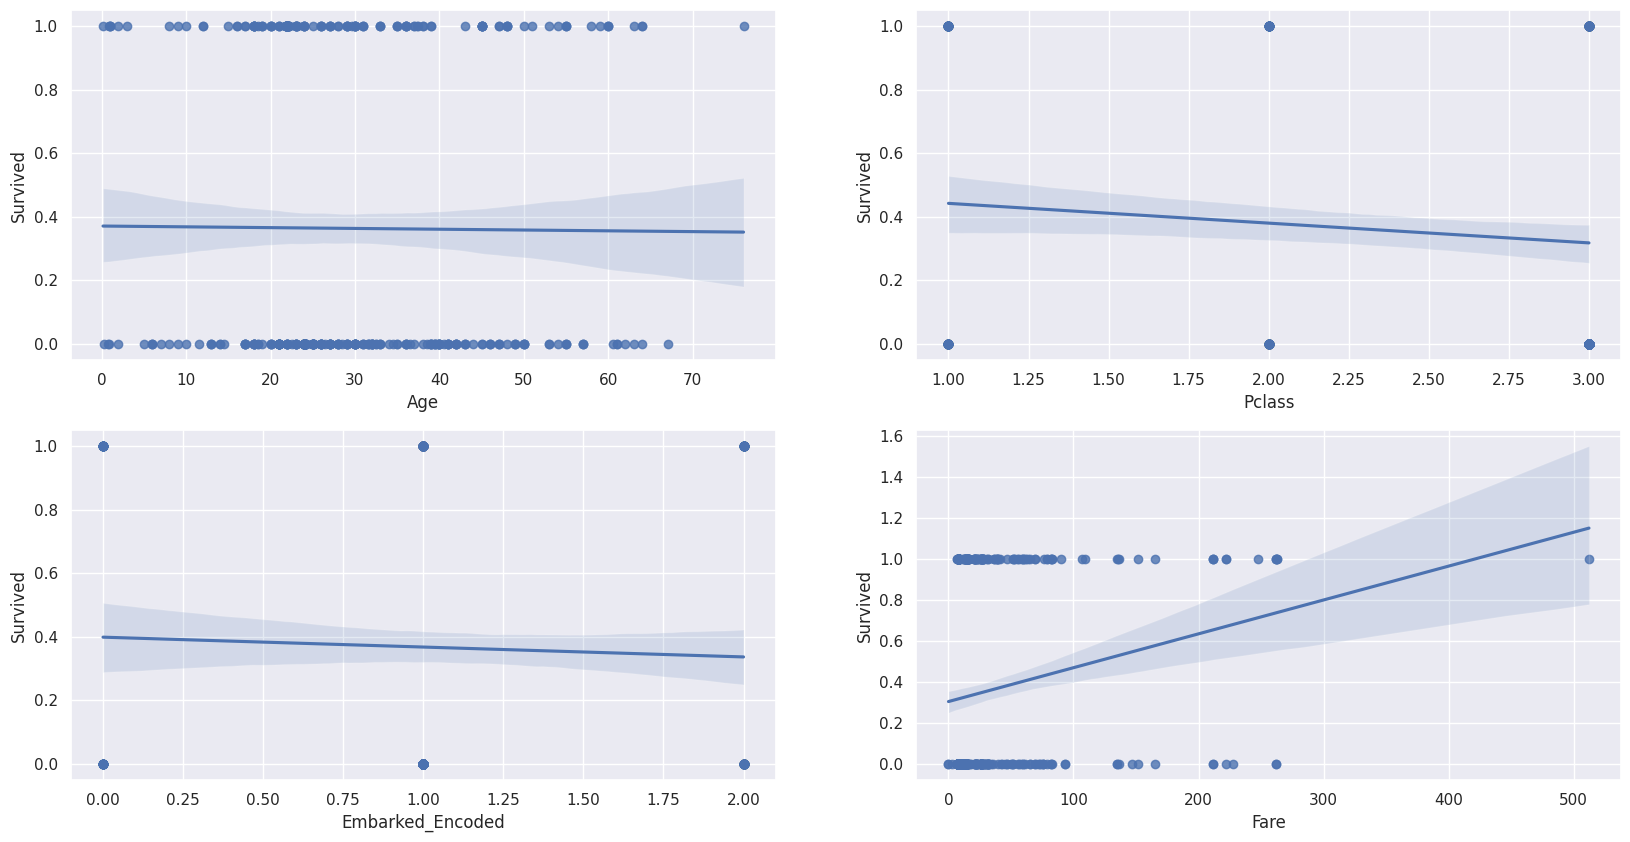

In [28]:
fig, axx = plt.subplots(2, 2, figsize=(20,10))

sns.regplot(x='Age', y='Survived', data=df, scatter=True, ax=axx[0][0])

sns.regplot(x='Pclass', y='Survived', data=df, scatter=True, ax=axx[0][1])

df['Embarked_Encoded']  = df['Embarked'].map({"Q":0, "S":1, "C":2})

sns.regplot(x='Embarked_Encoded', y='Survived', data=df, scatter=True, ax=axx[1][0])
df.drop(['Embarked_Encoded'], axis=1, inplace=True)

sns.regplot(x='Fare', y='Survived', data=df, scatter=True, ax=axx[1][1])


plt.show()

**Pclass (1) has a high survival rate**

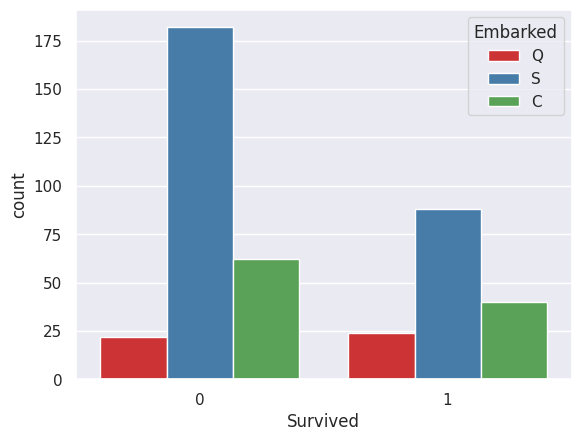

In [29]:
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=df, hue="Embarked", palette="Set1");

### Removing Outliers

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Encoded
0,0,3,male,34.5,0,0,7.8292,Q,0
1,1,3,female,47.0,1,0,7.0000,S,1
2,0,2,male,62.0,0,0,9.6875,Q,0
3,0,3,male,27.0,0,0,8.6625,S,0
4,1,3,female,22.0,1,1,12.2875,S,1


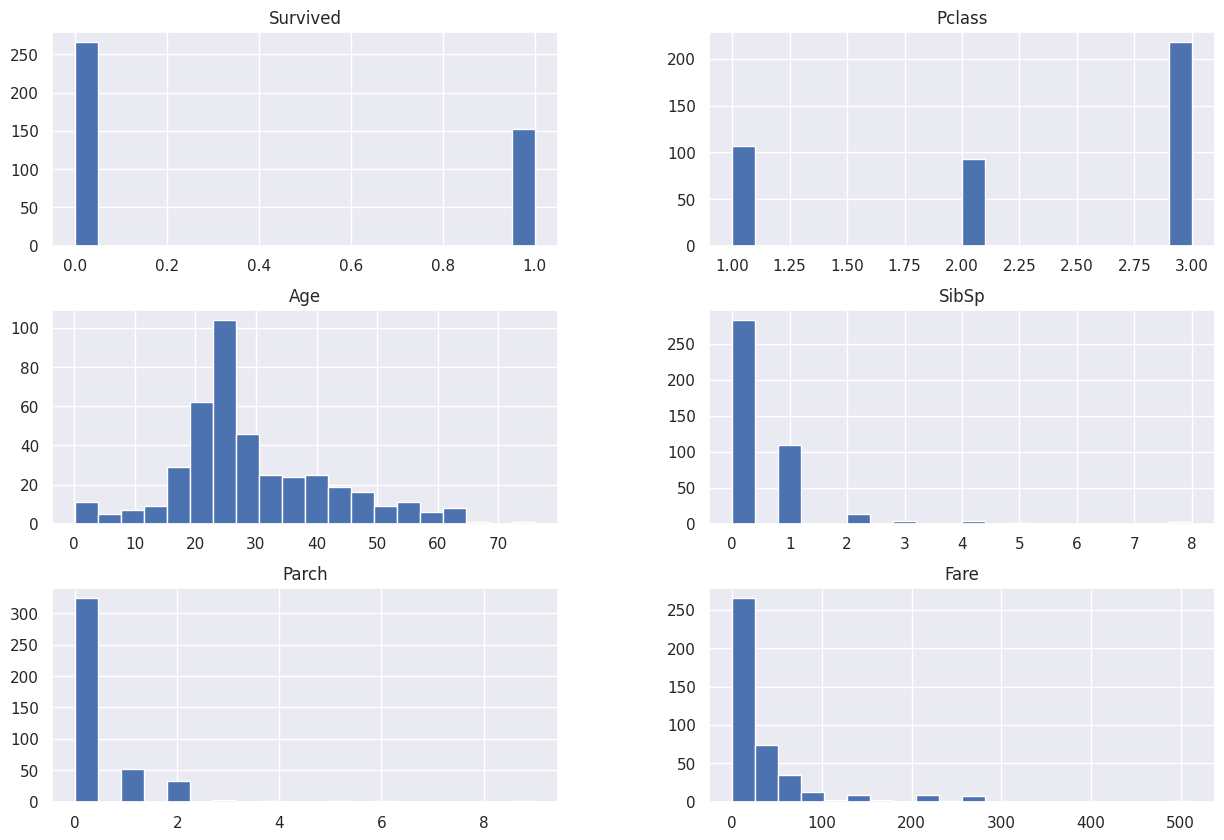

In [31]:
df.drop(['Sex', 'Sex_Encoded'], axis=1).hist(bins=20, figsize=(15,10))
plt.show()

Represent the Fare and Age column in Box-plot

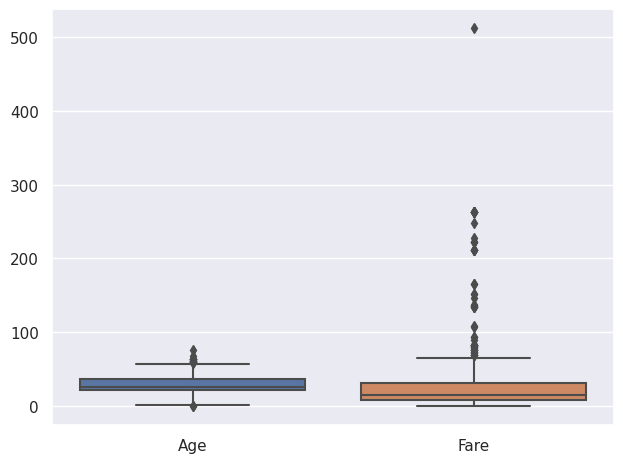

In [32]:
sns.boxplot(df[['Age', 'Fare']])
plt.tight_layout()
plt.show()

**Skewness**

the skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers.

In [33]:
print('skewness value of Age: ',df['Age'].skew())
print('skewness value of Fare: ',df['Fare'].skew())

skewness value of Age:  0.6802503442642999
skewness value of Fare:  3.6915998329393105


The Fare column is **Right Skewed**

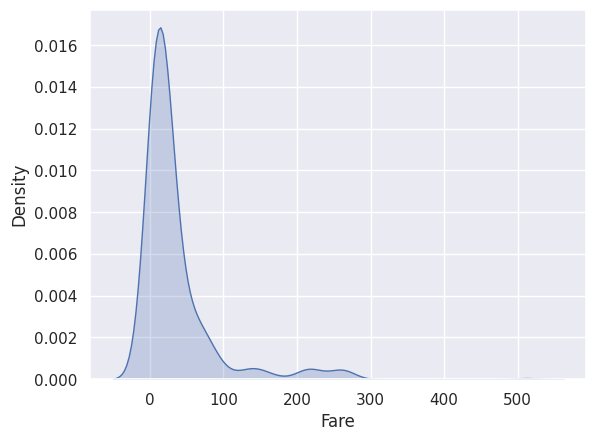

In [34]:
sns.kdeplot(df['Fare'], fill=True)
plt.show()

Now, using **IQR (Inter Quartile Range)**

**IQR = Q3 – Q1**

**Q3 = 75% percentail**

**Q1 = 25% percentail**


Upper and lower bound

**lower-bound = Q1 - 1.5 * IQR**

**upper-bound = Q2 - 1.5 * IQR**

In [35]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the Fare column
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

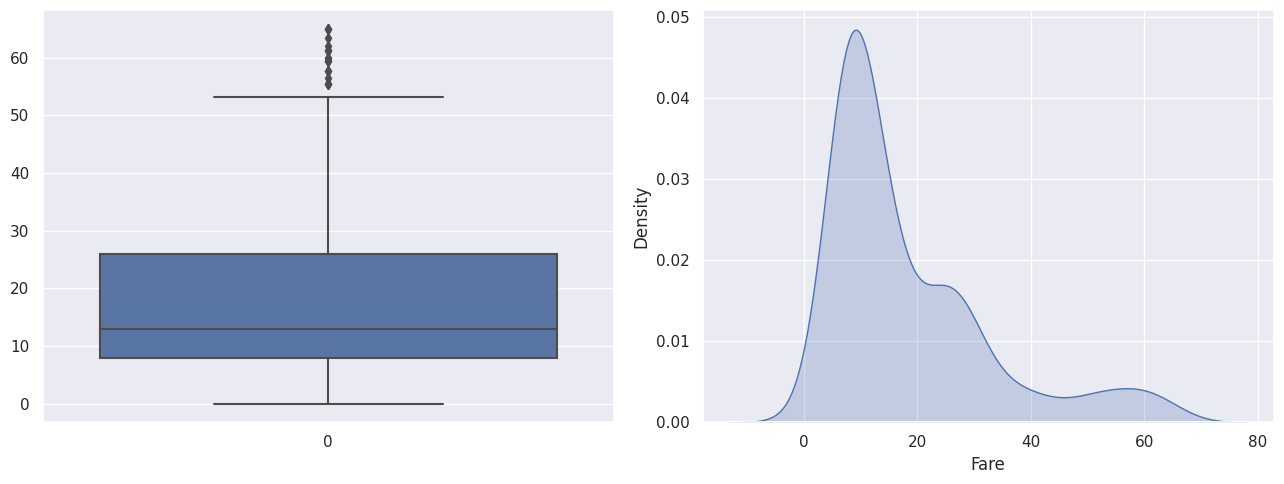

In [36]:
fig, axx = plt.subplots(1, 2, figsize=(13,5))
sns.boxplot(df['Fare'], ax=axx[0])
sns.kdeplot(df['Fare'], fill=True, ax=axx[1])
plt.tight_layout()

# Feature Engineering

In [37]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Encoded
0,0,3,male,34.5,0,0,7.8292,Q,0
1,1,3,female,47.0,1,0,7.0000,S,1
2,0,2,male,62.0,0,0,9.6875,Q,0
3,0,3,male,27.0,0,0,8.6625,S,0
4,1,3,female,22.0,1,1,12.2875,S,1


We will create a new **feature called Alone and familiars**. If the person was traveling alone or with family based on SibSp (Siblings/Spouses) and Parch (Parents/Children) attributes, also the size of the family.

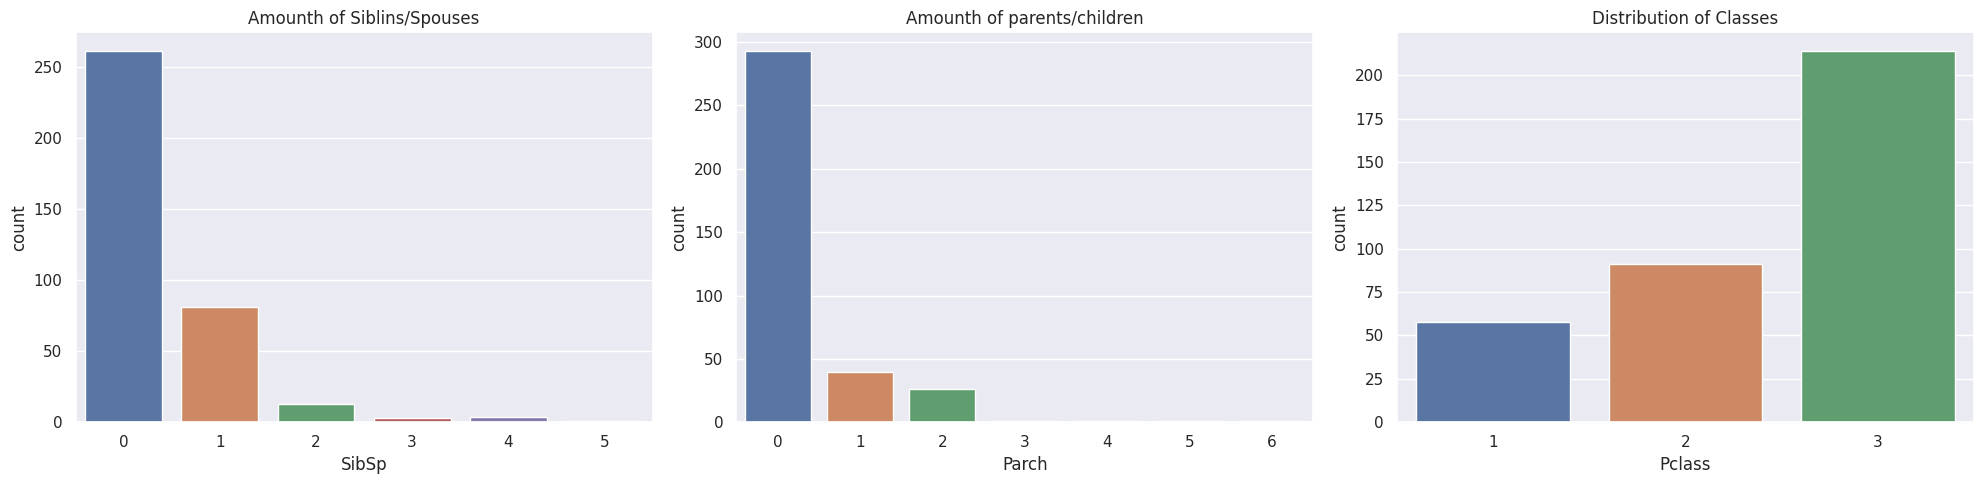

In [38]:
fig, axx = plt.subplots(1, 3, figsize=(20,5))
axx[0].set_title('Amounth of Siblins/Spouses')
sns.countplot(x='SibSp', data=df, ax=axx[0])
axx[1].set_title('Amounth of parents/children')
sns.countplot(x='Parch', data=df, ax=axx[1])
axx[2].set_title('Distribution of Classes')
sns.countplot(x='Pclass', data=df, ax=axx[2])
plt.tight_layout()

In [39]:
def create_alone_feature(SibSp_Parch):
    if (SibSp_Parch[0]+SibSp_Parch[1])==0:
        return 1
    else:
        return 0

df['Alone'] = df[['SibSp','Parch']].apply(create_alone_feature, axis=1)
df['Familiars'] = 1 + df['SibSp'] + df['Parch']

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Encoded,Alone,Familiars
0,0,3,male,34.5,0,0,7.8292,Q,0,1,1
1,1,3,female,47.0,1,0,7.0000,S,1,0,2
2,0,2,male,62.0,0,0,9.6875,Q,0,1,1
3,0,3,male,27.0,0,0,8.6625,S,0,1,1
4,1,3,female,22.0,1,1,12.2875,S,1,0,3


OneHotEncoding the Embarked column

In [41]:
df=pd.get_dummies(df, columns = ['Embarked'], drop_first=True)

In [42]:
show_missing_values(df)

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_Encoded    0
Alone          0
Familiars      0
Embarked_Q     0
Embarked_S     0
dtype: int64


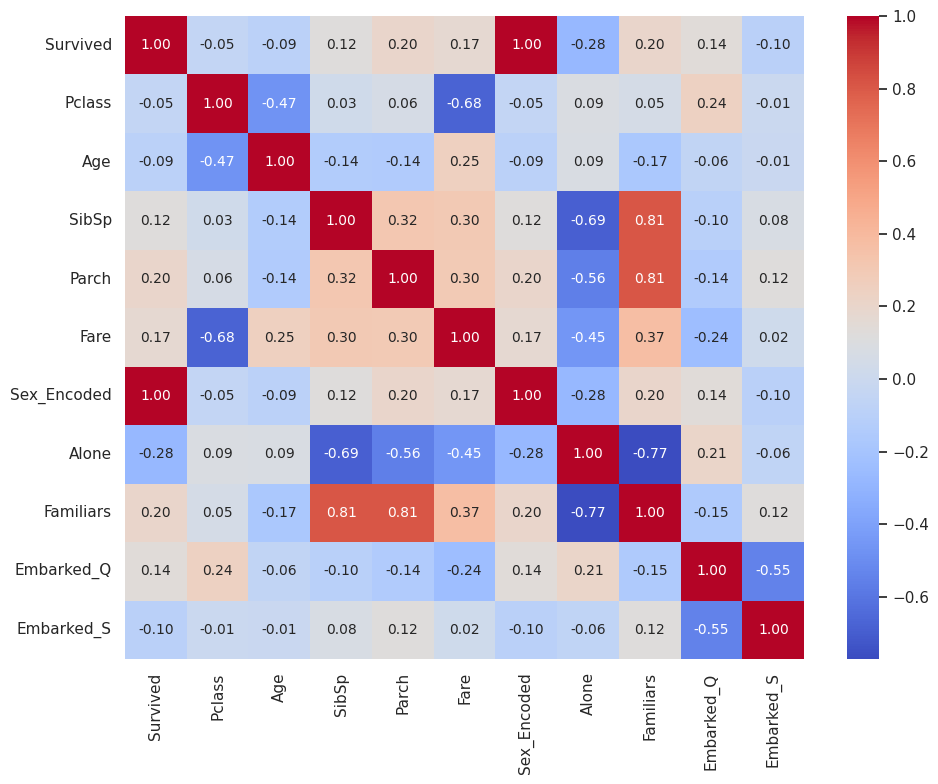

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cbar=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [44]:
# Feature columns
feature_col = ['Pclass','Age', 'Fare', 'Familiars', 'Parch']

# Independent Variable
X = df[feature_col]

# Dependent Variable
y = df['Survived']

Normalize data

In [45]:
from sklearn.preprocessing import MinMaxScaler
mnms = MinMaxScaler()
X = pd.DataFrame(mnms.fit_transform(X), columns=X.columns)

Train test split

70 + 30 ratio

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=143)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(254, 5)
(109, 5)
(254,)
(109,)


# Model building

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [48]:
models = [
    ('LogisticRegression', LogisticRegression()),
    ('SVC', SVC(gamma='auto')),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('ExtraTreesClassifier', ExtraTreesClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('LGBMClassifier', LGBMClassifier()),
]

In [49]:
for name, model in models:
  print(f"Training.... {name}")
  clf = model.fit(X_train, y_train)
  print('Training score: ', round(clf.score(X_train, y_train),3))
  print('Testing score: ', round(clf.score(X_test, y_test),3))
  print("--"*20)

Training.... LogisticRegression
Training score:  0.677
Testing score:  0.642
----------------------------------------
Training.... SVC
Training score:  0.669
Testing score:  0.642
----------------------------------------
Training.... RandomForestClassifier
Training score:  0.992
Testing score:  0.734
----------------------------------------
Training.... AdaBoostClassifier
Training score:  0.835
Testing score:  0.734
----------------------------------------
Training.... GradientBoostingClassifier
Training score:  0.929
Testing score:  0.716
----------------------------------------
Training.... ExtraTreesClassifier
Training score:  0.992
Testing score:  0.716
----------------------------------------
Training.... DecisionTreeClassifier
Training score:  0.992
Testing score:  0.706
----------------------------------------
Training.... XGBClassifier
Training score:  0.976
Testing score:  0.697
----------------------------------------
Training.... LGBMClassifier
Training score:  0.917
Testing

Model summary best to worst

**LGBMClassifier:** Training score - 0.917, Testing score - 0.761


**RandomForestClassifier:** Training score - 0.992, Testing score - 0.734


**AdaBoostClassifier:** Training score - 0.835, Testing score - 0.734


**GradientBoostingClassifier:** Training score - 0.929, Testing score - 0.716


**ExtraTreesClassifier:** Training score - 0.992, Testing score - 0.697


**DecisionTreeClassifier:** Training score - 0.992, Testing score - 0.697


**XGBClassifier:** Training score - 0.976, Testing score - 0.697

**LogisticRegression:** Training score - 0.677, Testing score - 0.642

**SVC:** Training score - 0.669, Testing score - 0.642

In [50]:
def LGBM_model(**param):
    lgbm = LGBMClassifier(**param).fit(X_train, y_train)
    print('Training score:', round(lgbm.score(X_train, y_train), 3))
    print('Testing score:', round(lgbm.score(X_test, y_test), 3))

LGBM_model()

Training score: 0.917
Testing score: 0.761


### Hyperparameter Tunning

#### Grid Search

In [51]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'num_leaves': [20, 30, 40],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
}

# Create an instance of the LGBMClassifier
lgbm = LGBMClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)  # X_train and y_train are your training data

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 20}
Best score:  0.7363137254901961


#### Randomized Search

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# Step 1: Expand the hyperparameter search space

param_grid = {
    'num_leaves': [10, 20, 30, 40, 50],
    'max_depth': [5, 10, 15, 20],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300, 400],
    'min_child_samples': [10, 20, 30, 40, 50],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0]
}

# Randomized Search
print(f"-------------Randomized Search-----------------")
random_search = RandomizedSearchCV(estimator=LGBMClassifier(), param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
LGBM_model(**random_search.best_params_)


-------------Randomized Search-----------------
Training score: 0.819
Testing score: 0.697


#### Optuna

Optuna is a software framework for automating the optimization process of these hyperparameters

In [53]:
import optuna

# Bayesian Optimization with Optuna
def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 10, 50),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.1, 0.05, 0.01]),
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 200, 300, 400]),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_categorical('reg_alpha', [0.0, 0.1, 0.5, 1.0])
    }
    lgbm = LGBMClassifier(**params).fit(X_train, y_train)
    return lgbm.score(X_test, y_test)

optuna_ = optuna.create_study(direction='maximize')
optuna_.optimize(objective, n_trials=50)

[I 2023-07-16 13:44:43,996] A new study created in memory with name: no-name-fe6302d5-a89d-465a-949a-93d4b8279a7a
[I 2023-07-16 13:44:44,017] Trial 0 finished with value: 0.6972477064220184 and parameters: {'num_leaves': 21, 'max_depth': 14, 'learning_rate': 0.05, 'n_estimators': 100, 'min_child_samples': 46, 'colsample_bytree': 0.8773255090145199, 'reg_alpha': 0.1}. Best is trial 0 with value: 0.6972477064220184.
[I 2023-07-16 13:44:44,067] Trial 1 finished with value: 0.7155963302752294 and parameters: {'num_leaves': 50, 'max_depth': 15, 'learning_rate': 0.01, 'n_estimators': 300, 'min_child_samples': 28, 'colsample_bytree': 0.7173192572335264, 'reg_alpha': 0.5}. Best is trial 1 with value: 0.7155963302752294.
[I 2023-07-16 13:44:44,102] Trial 2 finished with value: 0.7614678899082569 and parameters: {'num_leaves': 44, 'max_depth': 20, 'learning_rate': 0.1, 'n_estimators': 200, 'min_child_samples': 24, 'colsample_bytree': 0.9665687080018902, 'reg_alpha': 0.0}. Best is trial 2 with va

In [54]:
LGBM_model(**optuna_.best_params)

Training score: 0.799
Testing score: 0.78
